### Student Performance EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('student.csv')

In [3]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
df.shape

(1000, 8)

#### Checkpoints EDA
* Check Missing Values
* Check Duplicates
* check datatype
* check number of unique values in each feature
* check statistics of dataset
* check various categories present in different categorical columns

In [5]:
# check missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
# check duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [7]:
df.duplicated().value_counts()

False    1000
dtype: int64

In [8]:
df[df.duplicated()].count()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# unique feature values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
# unique values of feature
df['race_ethnicity'].value_counts()
# imbalance dataset

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [12]:
## statistics of data 
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [13]:
# make 2 groups
# 1 - for categorical feature,
# 2 - for numerical feature
numerical_feature = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype =='O']

In [14]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

In [15]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [16]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3 
df

gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     total_score    average  
0            218  72.666667  
1            247  82.333333  
2            278  92.666667  
3            148  49.333333  
4            229  76.333333  
..           ...        ...  
995          282  94.000000  
996          172  57.333333  
997          195  65.000000  
998          223  74.333333  
999          249  83.000000  

[1000 rows x 10 columns]

### explore more via visualization

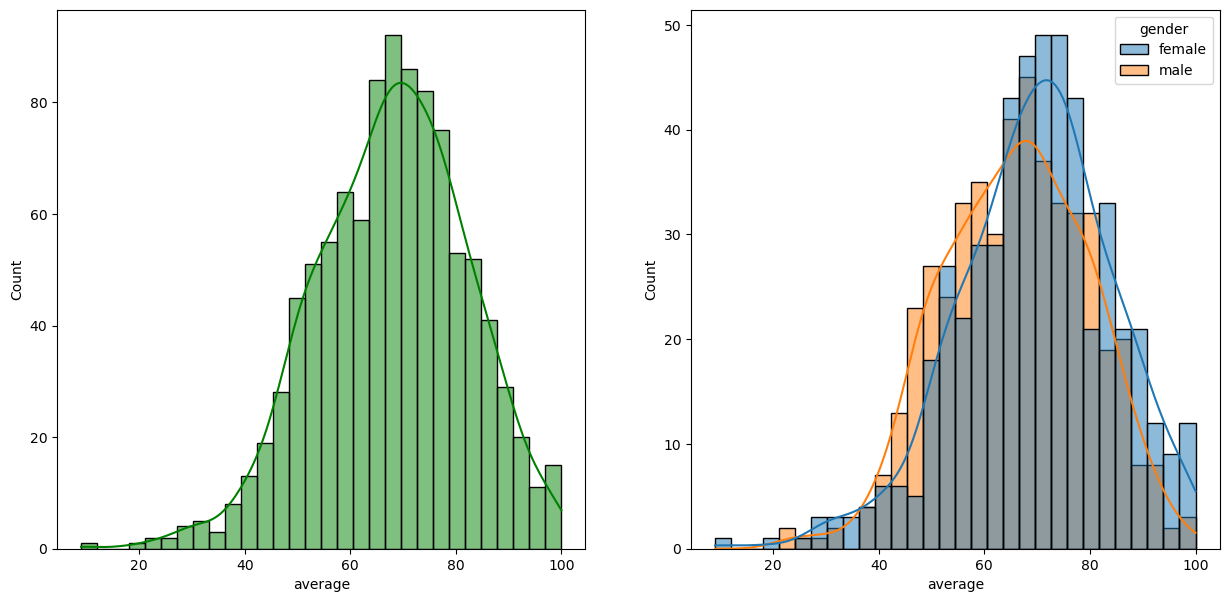

In [21]:
fig, axis = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data= df, x = 'average', bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data= df, x = 'average', bins = 30, kde=True, hue = 'gender')
plt.show()

## insights
female students tend to perform better than male students

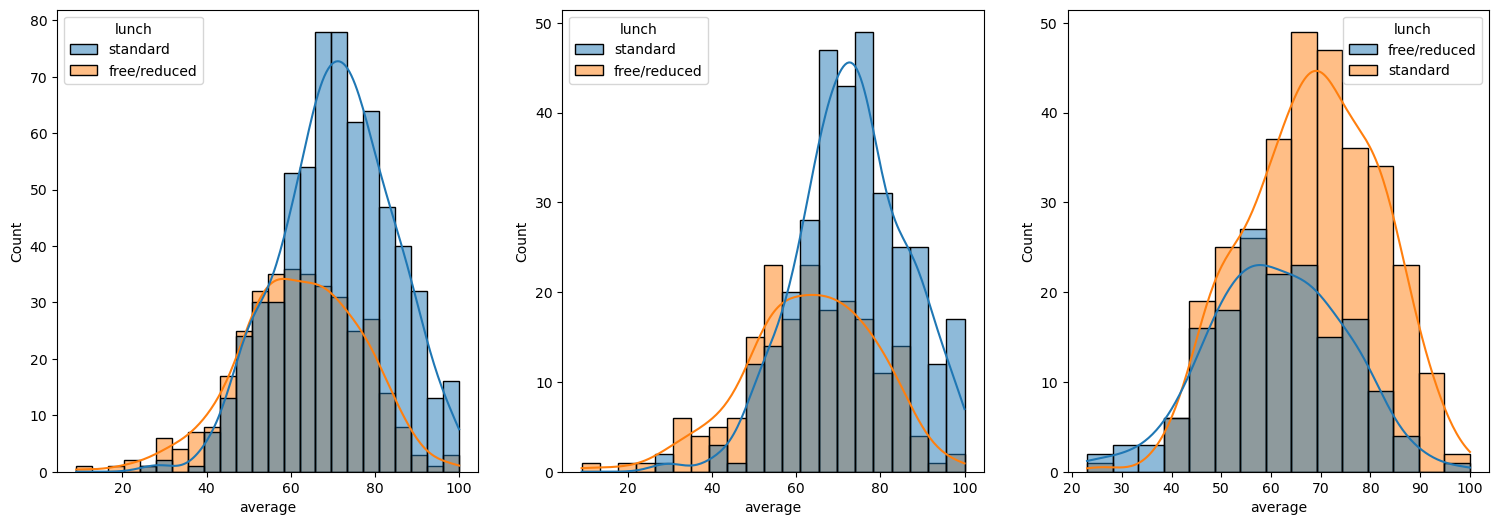

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde=True, hue ='lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde=True, hue ='lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde=True, hue ='lunch')
plt.show()

### Insights
* standard lunch helps student perform well in exam
* standard lunch helps student perform well in exam in case of both male and female

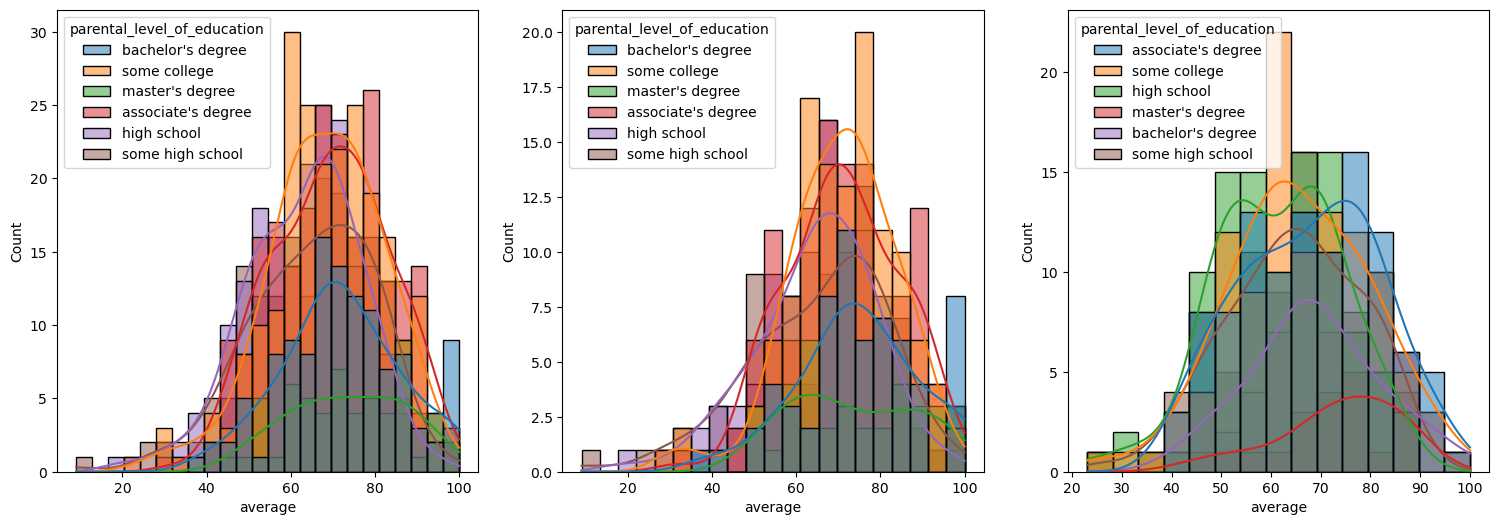

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde=True, hue ='parental_level_of_education')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde=True, hue ='parental_level_of_education')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde=True, hue ='parental_level_of_education')
plt.show()

### Insights
* In general, parental education doesn't help student to perform well in exam.
* in 2nd plot, parent's whose education is of associate degree or masters degree, their male child tend to perform well in exam.
* In 3rd plot, there is not effect of parent's education
* we can say, for females, parental education doesn't matter, they study on their own interest.

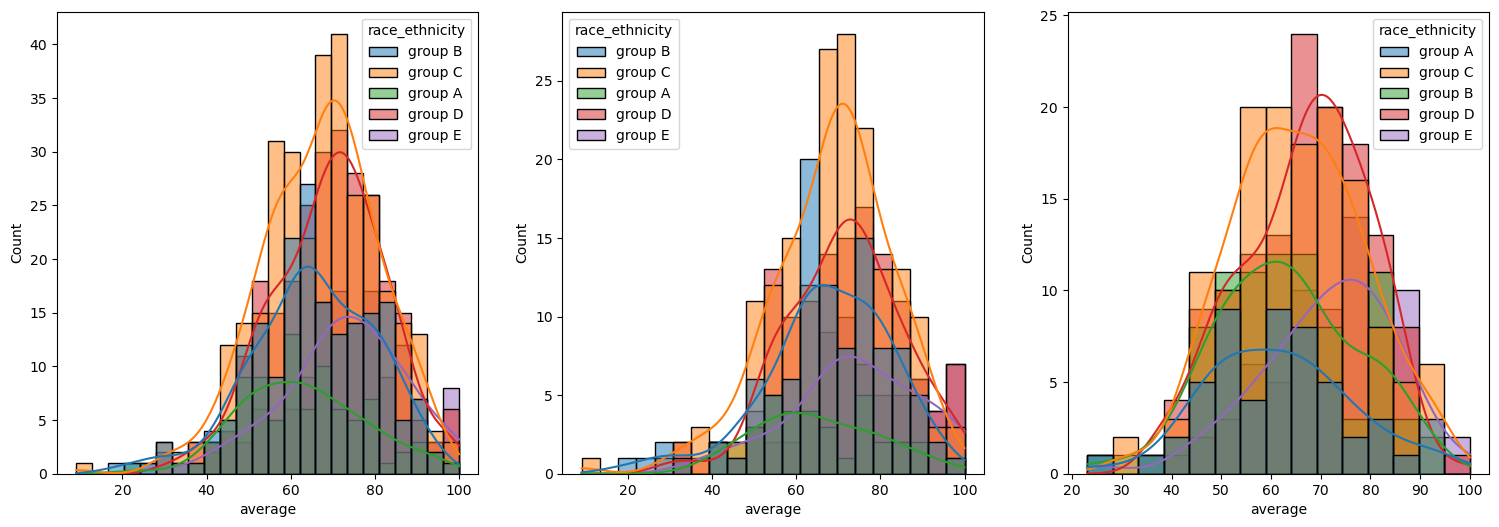

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde=True, hue ='race_ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde=True, hue ='race_ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde=True, hue ='race_ethnicity')
plt.show()

### Insights
* Student of group A, B tend to perform bad in exam.
* Students of group A & B tend to perform bad in exam irrespective of their gender

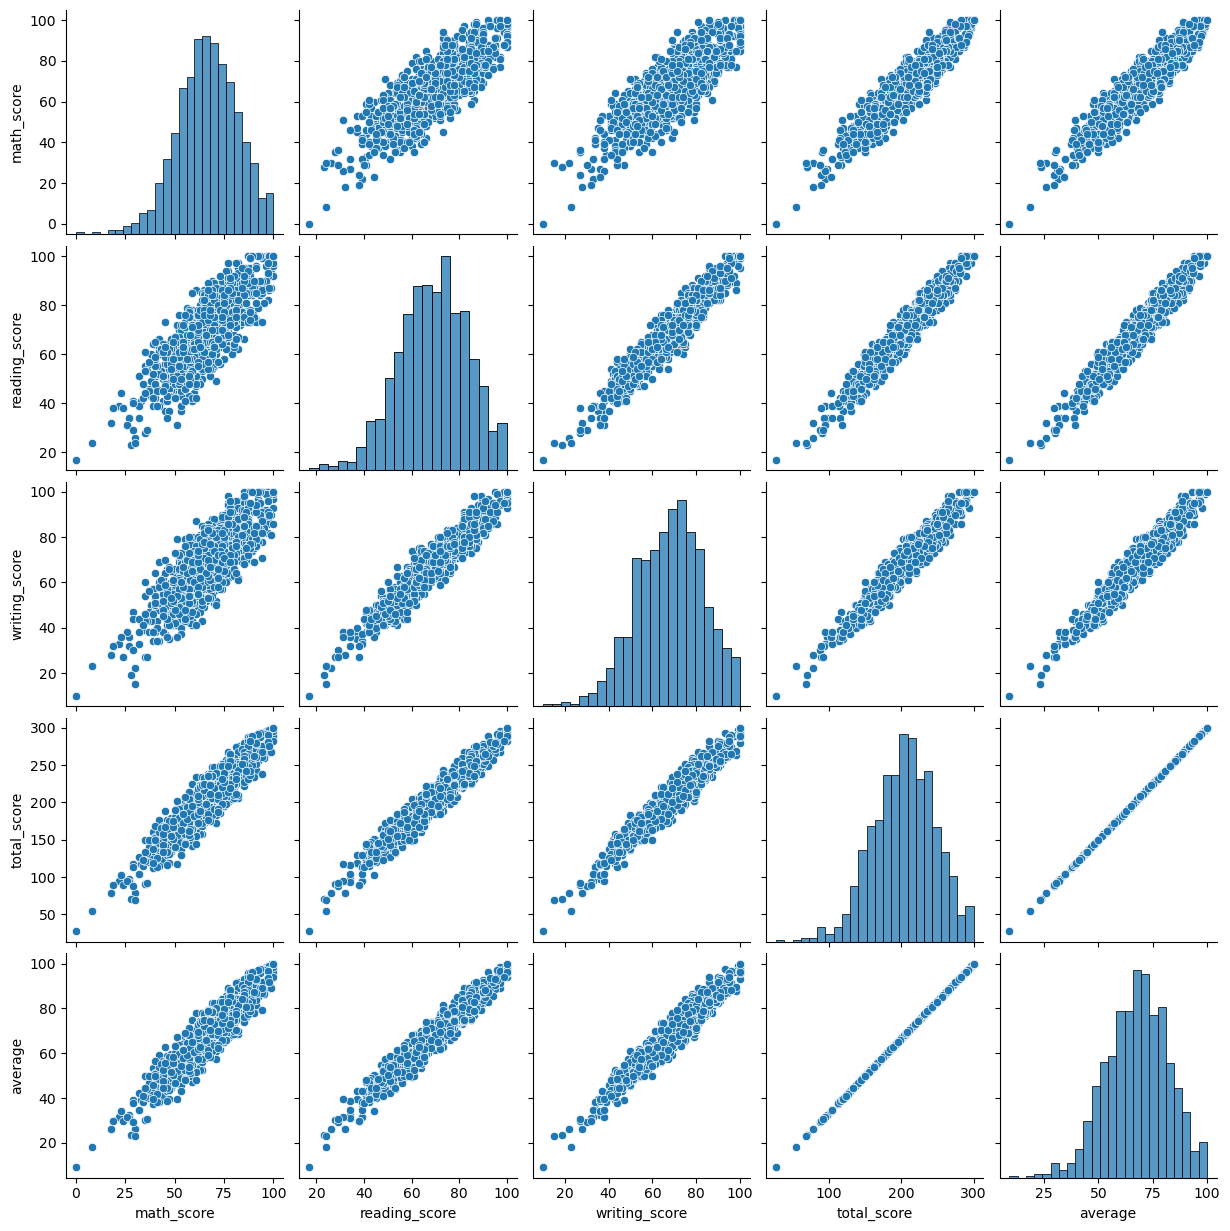

In [26]:
sns.pairplot(df)

<Axes: >

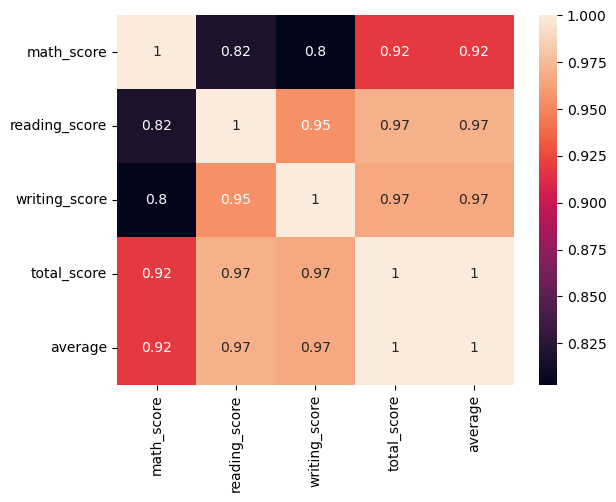

In [28]:
sns.heatmap(df.corr(), annot=True)